In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import math
import random
from matplotlib import collections as mc
import scipy.stats as st
from scipy import stats
import statsmodels.api as sm
from collections import defaultdict
from scipy.constants import golden
import gc
from io import StringIO
# gc.collect()

# Esiti Biologia

In [2]:
df = pd.read_csv("Risultati EBPP 24 GENNAIO 2025.csv", sep=";", decimal=".")
df.describe()

,primo_voto_nov,primo_errate,primo_vuote,primo_corrette,primo_vegetale,primo_animale,primo_voto_gen,secondo_errate,secondo_vuote,secondo_corrette,secondo_vegetale,secondo_animale,secondo_voto,voto_medio
count,100.000000,52.000000,52.000000,52.000000,51.000000,52.000000,52.000000,35.000000,35.000000,35.000000,35.000000,34.000000,35.000000,21.000000
mean,15.915000,22.153846,20.750000,37.096154,19.916667,12.028846,16.621154,20.628571,18.028571,41.342857,20.107143,16.558824,19.145714,22.952381
std,5.682925,9.738512,11.189762,9.618731,5.474867,5.848507,5.496927,8.775252,12.067179,12.607054,7.863562,6.553122,6.920317,3.707778
min,1.400000,4.000000,0.000000,10.000000,5.750000,1.750000,4.500000,7.000000,4.000000,12.000000,8.500000,4.250000,7.400000,18.000000
25%,12.200000,14.750000,13.750000,30.000000,16.125000,7.687500,13.525000,14.000000,9.500000,33.000000,13.875000,12.062500,14.450000,19.000000
50%,16.300000,22.000000,18.000000,37.000000,20.750000,9.875000,15.550000,20.000000,16.000000,40.000000,18.000000,16.375000,18.100000,24.000000
75%,20.050000,27.250000,30.000000,42.250000,23.500000,15.562500,19.350000,27.500000,22.500000,51.000000,25.000000,22.562500,24.650000,25.000000
max,27.300000,46.000000,47.000000,60.000000,30.750000,26.750000,29.900000,41.000000,59.000000,63.000000,34.500000,28.000000,31.800000,29.000000


---

Numero e percentuale di studenti che è stata complessivamente sufficiente nell'esame:

In [3]:
print(str(df["voto_medio"].count()) + " - " + str(round((df["voto_medio"].count() / df["voto_medio"].size) * 100, 2)) + "%")

21 - 17.65%


---

Numero e percentuale di studenti che è stata sufficiente nel primo esame (sia Novembre, che Gennaio):

In [4]:
print(str(df[(df["primo_voto_nov"] >= 18) | (df["primo_voto_gen"] >= 18)]["matricola"].count()) + " - " + str(round((df[(df["primo_voto_nov"] >= 18) | (df["primo_voto_gen"] >= 18)]["matricola"].count() / df["matricola"].count()) * 100, 2)) + "%")

53 - 44.54%


---

Numero e percentuale di studenti che è stata sufficiente nel primo esame a Novembre:

In [5]:
print(str(df[(df["primo_voto_nov"] >= 18)]["matricola"].count()) + " - " + str(round((df[(df["primo_voto_nov"] >= 18)]["matricola"].count() / df["matricola"].count()) * 100, 2)) + "%")

37 - 31.09%


---

Numero e percentuale di studenti che è stata sufficiente nel il primo esame a Gennaio:

In [6]:
print(str(df[(df["primo_voto_gen"] >= 18)]["matricola"].count()) + " - " + str(round((df[(df["primo_voto_gen"] >= 18)]["matricola"].count() / df["matricola"].count()) * 100, 2)) + "%")

16 - 13.45%


---

Numero e percentuale di studenti che è stata sufficiente nel secondo esame:

In [7]:
print(str(df[(df["secondo_voto"] >= 18)]["matricola"].count()) + " - " + str(round((df[(df["secondo_voto"] >= 18)]["matricola"].count() / df["matricola"].count()) * 100, 2)) + "%")

18 - 15.13%


---

Medie di risposte nel primo esame:

In [8]:
print("Errate: " + str(round(df["primo_errate"].mean(), 2)) + " - " + str(round((df["primo_errate"].mean() / 80) * 100, 2)) + "%")
print("Vuote: " + str(round(df["primo_vuote"].mean(), 2)) + " - " + str(round((df["primo_vuote"].mean() / 80) * 100, 2)) + "%")
print("Corrette: " + str(round(df["primo_corrette"].mean(), 2)) + " - " + str(round((df["primo_corrette"].mean() / 80) * 100, 2)) + "%")

Errate: 22.15 - 27.69%
Vuote: 20.75 - 25.94%
Corrette: 37.1 - 46.37%


---

Medie di risposte nel secondo esame:

In [9]:
print("Errate: " + str(round(df["secondo_errate"].mean(), 2)) + " - " + str(round((df["secondo_errate"].mean() / 80) * 100, 2)) + "%")
print("Vuote: " + str(round(df["secondo_vuote"].mean(), 2)) + " - " + str(round((df["secondo_vuote"].mean() / 80) * 100, 2)) + "%")
print("Corrette: " + str(round(df["secondo_corrette"].mean(), 2)) + " - " + str(round((df["secondo_corrette"].mean() / 80) * 100, 2)) + "%")

Errate: 20.63 - 25.79%
Vuote: 18.03 - 22.54%
Corrette: 41.34 - 51.68%


---

Punteggio medio in Biologia Vegetale per il primo esame:

In [10]:
print(str(round(df["primo_vegetale"].mean() , 2)))

19.92


---

Punteggio medio in Biologia Animale per il primo esame:

In [11]:
print(str(round(df["primo_animale"].mean() , 2)))

12.03


---

Punteggio medio in Biologia Vegetale per il secondo esame:

In [12]:
print(str(round(df["secondo_vegetale"].mean() , 2)))

20.11


---

Punteggio medio in Biologia Animale per il secondo esame:

In [13]:
print(str(round(df["secondo_animale"].mean() , 2)))

16.56


---

Distribuzione dei voti di Biologia Vegetale del primo esame:

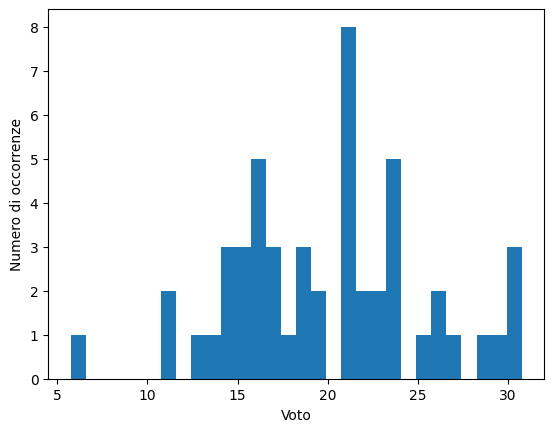

In [14]:
plt.hist(df["primo_vegetale"], bins=30)
plt.xlabel("Voto")
plt.ylabel("Numero di occorrenze")
plt.show()

---

Distribuzione dei voti di Biologia Animale del primo esame:

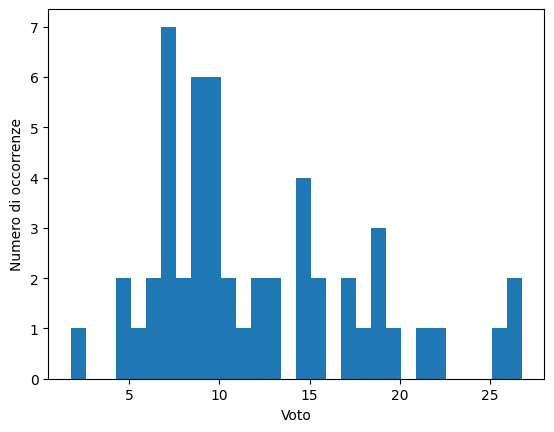

In [15]:
plt.hist(df["primo_animale"], bins=30)
plt.xlabel("Voto")
plt.ylabel("Numero di occorrenze")
plt.show()

---

Distribuzione dei voti di Biologia Vegetale del secondo esame:

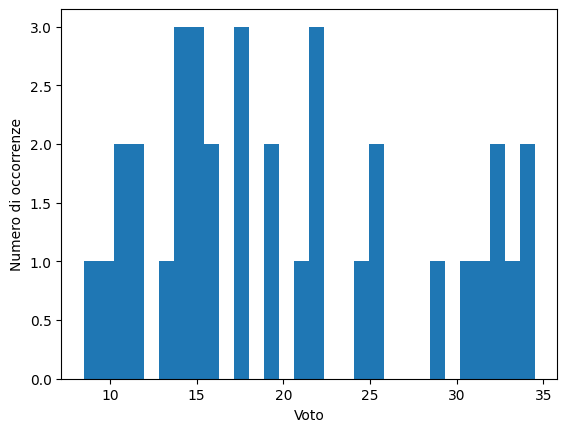

In [16]:
plt.hist(df["secondo_vegetale"], bins=30)
plt.xlabel("Voto")
plt.ylabel("Numero di occorrenze")
plt.show()

---

Distribuzione dei voti di Biologia Animale del secondo esame:

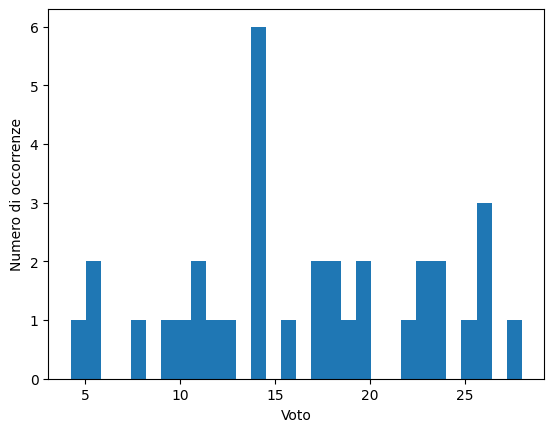

In [17]:
# df["primo_animale"].value_counts(bins=np.arange(0, 31, 1)).sort_index()
plt.hist(df["secondo_animale"], bins=30)
plt.xlabel("Voto")
plt.ylabel("Numero di occorrenze")
plt.show()

---

Distribuzione dei voti finali:

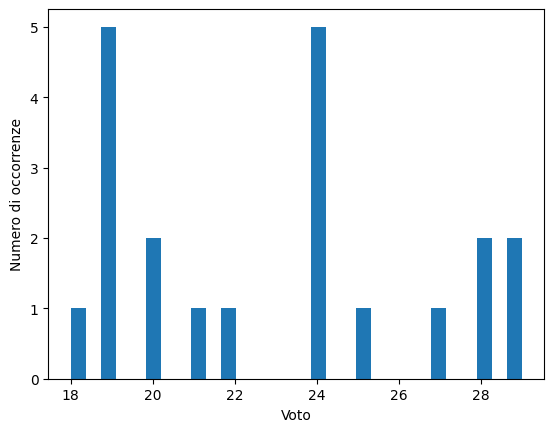

In [18]:
plt.hist(df["voto_medio"], bins=30)
plt.xlabel("Voto")
plt.ylabel("Numero di occorrenze")
plt.show()